In [91]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pyIEEM.data.utils import to_pd_interval

In [92]:
data_df = pd.read_csv('FormatData_ComesF_2.csv', index_col = [0,1,2,3,4,5,6,7,8])
age_group_x = data.index.get_level_values('age_x').unique()
age_group_y = data.index.get_level_values('age_y').unique()

In [93]:
location = 'leisure_public'
duration = '< 5 min'
day_type = 'weekday'

In [94]:
data = data_df.loc[slice(None), slice(None), location, duration, day_type, False].reset_index()
data.drop(columns='sector', inplace=True)

In [95]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.api as sm

fam = sm.families.NegativeBinomial()
ind = sm.cov_struct.Exchangeable()
mod = smf.gee("reported_contacts ~ age_x + age_y", "ID", data, cov_struct=ind, family=fam)
res = mod.fit()
print(res.summary())

                               GEE Regression Results                              
Dep. Variable:           reported_contacts   No. Observations:                17658
Model:                                 GEE   No. clusters:                     1962
Method:                        Generalized   Min. cluster size:                   9
                      Estimating Equations   Max. cluster size:                   9
Family:                   NegativeBinomial   Mean cluster size:                 9.0
Dependence structure:         Exchangeable   Num. iterations:                     7
Date:                     Mon, 10 Jul 2023   Scale:                           1.000
Covariance type:                    robust   Time:                         00:37:18
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -5.0054      0.627     -7.985      0.000      -6

In [96]:
data['predicted_contacts'] = res.predict()

In [97]:
data.drop(columns=['ID', 'reported_contacts'], inplace=True)
data = data.groupby(by=['age_x', 'age_y']).last()
matrix = data.values.reshape([len(age_group_x), len(age_group_y)])

In [98]:
matrix

array([[0.00670161, 0.00621931, 0.05251663, 0.05938867, 0.05530375,
        0.03289703, 0.01611261, 0.00817968, 0.00110688],
       [0.00759974, 0.0070528 , 0.05955473, 0.06734774, 0.06271537,
        0.03730578, 0.01827197, 0.00927589, 0.00125522],
       [0.0193725 , 0.01797829, 0.15181107, 0.17167622, 0.15986785,
        0.09509621, 0.04657711, 0.02364519, 0.00319968],
       [0.01262553, 0.01171689, 0.09893899, 0.11188559, 0.10418979,
        0.06197653, 0.03035544, 0.01541015, 0.00208531],
       [0.0207526 , 0.01925907, 0.16262612, 0.18390647, 0.17125687,
        0.10187089, 0.04989528, 0.02532968, 0.00342763],
       [0.02383513, 0.02211975, 0.18678212, 0.21122339, 0.19669486,
        0.11700249, 0.05730657, 0.02909207, 0.00393676],
       [0.02429305, 0.02254472, 0.1903706 , 0.21528144, 0.20047378,
        0.11925035, 0.05840755, 0.02965099, 0.00401239],
       [0.02362803, 0.02192756, 0.18515922, 0.20938813, 0.19498583,
        0.11598588, 0.05680865, 0.0288393 , 0.00390255],


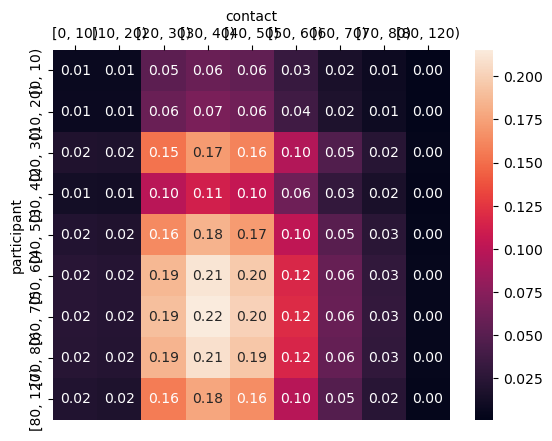

In [99]:
fig,ax=plt.subplots()
ax = sns.heatmap(matrix, annot=True, fmt='.2f')
ax.xaxis.tick_top() # x axis on top
ax.xaxis.set_label_position('top')
ax.set(xticklabels=list(age_group_x.values.astype(str)), yticklabels=list(age_group_y.values.astype(str)))
ax.set(xlabel='contact', ylabel='participant')
plt.show()
plt.close()